# Practical 3: CIFAR-10

This is the second task of Practical 3. Your task is to use **transfer learning** to build a convolutional neural network to tackle the CIFAR-10 dataset (https://www.cs.toronto.edu/~kriz/cifar.html). 
You could select an existing trained model (VGG16 excluded) from Keras (https://keras.io/api/applications/) and fine-tune it to build a classifier for CIFAR-10.

We will grade your code based on the accuracy of your model. 
Your CNN should achieve at least an accuracy of 75% to pass the practical.
You can get 5 bonus points by achieving an accuracy of 85%+.


The model files might be too large to be uploaded to GitHub. 
Please use the following link to upload your models: https://seafile.ifi.uzh.ch/u/d/695f63e725b641ed8633/

Name the model file `{repository_name}-CIFAR10.h5`. For example, if your repository is FDS22-M0, you should name the model file `FDS22-M0-CIFAR10.h5`. If you are not satisfied with the model you have uploaded, you can upload a new one with the same name. We will only look at the newest model. Nevertheless, try to upload as few times as possible, since the online drive has a limited amount of space. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras.datasets import cifar10
tf.__version__
tf.keras.__version__

2023-01-05 20:42:59.763611: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libnvinfer.so.6'; dlerror: libnvinfer.so.6: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/tiger/yarn_deploy/jdk/jre/lib/amd64/server:/opt/tiger/yarn_deploy/hadoop_current/lib/native:/opt/tiger/yarn_deploy/hadoop_current/lib/native/ufs:/opt/tiger/yarn_deploy/hadoop/lib/native:/opt/tiger/yarn_deploy/hadoop_current/lib/native:/usr/local/cuda/lib64::/usr/local/cuda/compat
2023-01-05 20:42:59.763729: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libnvinfer_plugin.so.6'; dlerror: libnvinfer_plugin.so.6: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/tiger/yarn_deploy/jdk/jre/lib/amd64/server:/opt/tiger/yarn_deploy/hadoop_current/lib/native:/opt/tiger/yarn_deploy/hadoop_current/lib/native/ufs:/opt/tiger/yarn_deploy/hadoop/lib/native:/opt/tiger/yarn_deplo

'2.2.4-tf'

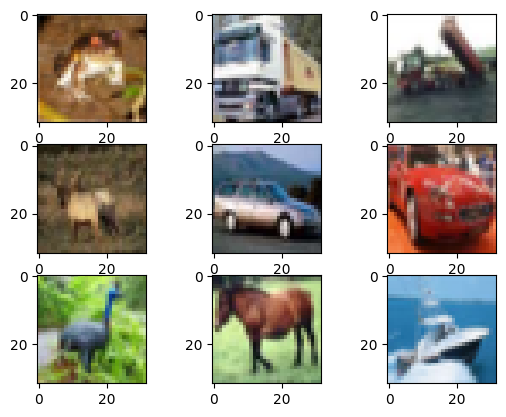

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [3]:
(X_train_full, y_train_full), (X_test, y_test) = cifar10.load_data()

for i in range(0,9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train_full[i])
plt.show()

print(X_train_full.shape)
print(y_train_full.shape)
print(X_test.shape)
print(y_test.shape)

In [4]:
# one-hot encoding
y_train_full = keras.utils.to_categorical(y_train_full, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

# normalisation
X_train_full = X_train_full/255.0
X_test = X_test/255.0
print(X_train_full.shape)

# get validation dataset
np.random.seed(42) # we set the random seed to make sure everytime the data is shuffled in the same way 
shuffled_indices = np.random.permutation(X_train_full.shape[0])
X_valid, X_train = X_train_full[shuffled_indices[:5000]], X_train_full[shuffled_indices[5000:]]
y_valid, y_train = y_train_full[shuffled_indices[:5000]], y_train_full[shuffled_indices[5000:]]

(50000, 32, 32, 3)


In [5]:
# TODO: load the model you selected
model_transfer = tf.keras.applications.VGG19(include_top=False, input_shape=(32, 32, 3), weights='imagenet')
model_transfer.summary()


2023-01-05 20:43:10.500360: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2023-01-05 20:43:10.524017: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 0 with properties: 
pciBusID: 0000:b2:00.0 name: Tesla V100-SXM2-32GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 31.75GiB deviceMemoryBandwidth: 836.37GiB/s
2023-01-05 20:43:10.524167: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/tiger/yarn_deploy/jdk/jre/lib/amd64/server:/opt/tiger/yarn_deploy/hadoop_current/lib/native:/opt/tiger/yarn_deploy/hadoop_current/lib/native/ufs:/opt/tiger/yarn_deploy/hadoop/lib/native:/opt/tiger/yarn_deploy/hadoop_current/lib/native:/usr/local/cuda/lib64::/usr/local/cuda/compat
2023-01-05 20:43:10.524244: W tensorflo

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [6]:
# TODO: Transfer learning - build your own model based on the selected model
x = model_transfer.output
x = keras.layers.GlobalAveragePooling2D()(x)
print(x.shape)

x = keras.layers.Dense(512, activation='relu')(x)

output = keras.layers.Dense(10, activation='softmax')(x)

model = keras.Model(inputs=model_transfer.input, outputs=output)

# freeze the layers
for layer in model_transfer.layers:
    layer.trainable=True

model.summary()

(None, 512)
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)   

In [7]:
model.compile(
              # optimizer=keras.optimizers.Adam(),
              optimizer=keras.optimizers.SGD(lr=0.01),
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [8]:
# early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=20, horizontal_flip=True, zoom_range=0.1)
train_data_generator = datagen.flow(X_train, y_train, batch_size=256)

history = model.fit(
    train_data_generator, 
#     X_train, y_train,
    batch_size=256, epochs=30, 
    validation_data=(X_valid, y_valid),
    # callbacks=[early_stopping_cb],
    )

Train on 45000 samples, validate on 5000 samples
Epoch 1/30
45000/45000 [==============================] - 735s 16ms/sample - loss: 1.6181 - accuracy: 0.4447 - val_loss: 1.2753 - val_accuracy: 0.5522
Epoch 2/30
45000/45000 [==============================] - 726s 16ms/sample - loss: 1.0046 - accuracy: 0.6509 - val_loss: 1.1044 - val_accuracy: 0.6244
Epoch 3/30
45000/45000 [==============================] - 726s 16ms/sample - loss: 0.8125 - accuracy: 0.7185 - val_loss: 0.7991 - val_accuracy: 0.7268
Epoch 4/30
45000/45000 [==============================] - 722s 16ms/sample - loss: 0.6960 - accuracy: 0.7595 - val_loss: 0.7260 - val_accuracy: 0.7476
Epoch 5/30
45000/45000 [==============================] - 719s 16ms/sample - loss: 0.6417 - accuracy: 0.7768 - val_loss: 0.7184 - val_accuracy: 0.7552
Epoch 6/30
45000/45000 [==============================] - 723s 16ms/sample - loss: 0.5818 - accuracy: 0.7982 - val_loss: 0.5888 - val_accuracy: 0.7972
Epoch 7/30
45000/45000 [=====================

In [12]:
# show the structure of your model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

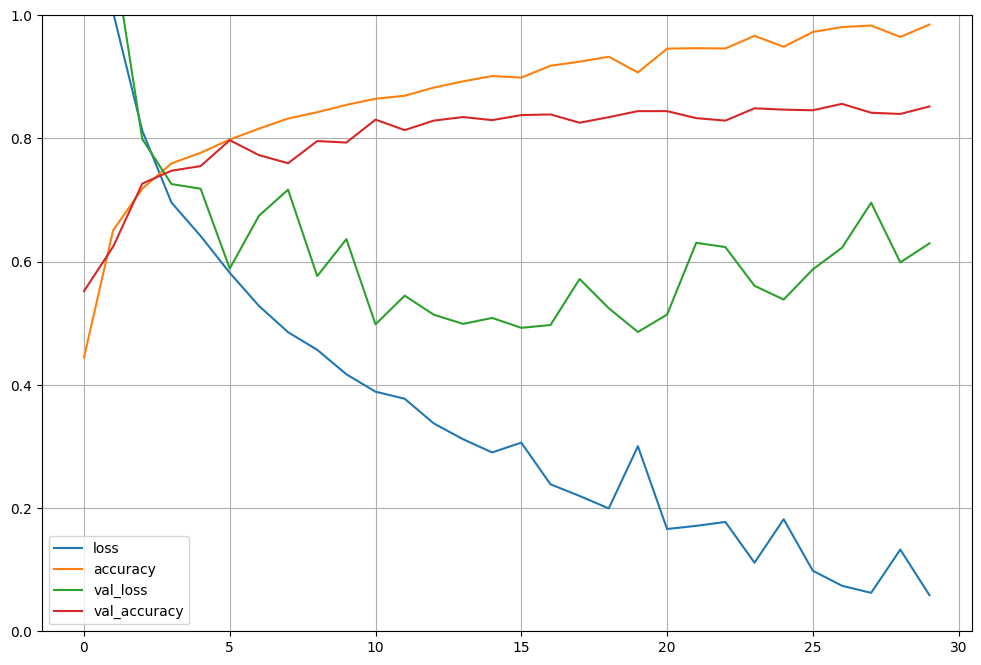

In [13]:
# Assume you have stored the training history in the variable "history"
# Show the learning curves
pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.gca().set_ylim(0, 1)
plt.grid(True)
plt.show()

## Load the model and evaluate it on the test data

In [9]:
model.evaluate(X_test, y_test)
model.save('FDS22-M133-CIFAR10.h5')

10000/10000 [==============================] - 38s 4ms/sample - loss: 0.6744 - accuracy: 0.8475


## Short report

Please write a few sentences explaining how you build and train the model. Please include the decisions you made, such as how you decide the number of layers reused from the selected model and the difficulties you met.

**Difficulties**
At the first time, the model's prediction capability fluctuates between 74.85%-76.91%. I used following methods to solve this problem.


**Explanation**
- I kept all layers of VGG19 and added some dense layers. 
- Since there are only 10 categories, I chose 512 as output space in order to keep the power of previous conv layers. (256 is not enough in this case).
- applied data argumentation
- increased batch_size: Small batch size might bring unstable gradients.  